In [31]:
import geopandas as gpd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
import helper_400

%load_ext autoreload
%autoreload 2
helper_400.set_sns_style()

import plotting

%load_ext autoreload
%autoreload 2
hs_dict = plotting.get_hotspopt_dict()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 800x600 with 0 Axes>

In [2]:
df = pd.read_parquet("outputs/hotspots_per_fips_rolling_wc.parquet")

In [3]:
df = df.groupby("GEOID").sum().reset_index()

In [4]:
hspts = plotting.get_hotspot_list()

In [5]:
df = df[['GEOID']+hspts]

In [6]:
df.to_parquet("outputs/agg_hotspots_per_fips_rolling_wc.parquet")

In [7]:
gdf = gpd.read_file('data/WesternUSCensusTract/CensusTract2020_WesternUS.shp')

# gpd.read_file("data/esri/FIPSMapping.gdb")
# gdf["FIPS_1"] = gdf.FIPS_1.astype(int)

In [8]:
df.head()

GEOID  wfday  heatday  smoke_pm_non_zero  smoke_pm_gt_five  hw  _hws  \
0  04001942600      2      312                406                69   0   626   
1  04001942700      9      312                437                68   0   664   
2  04001944000     43      317                411                61   1   664   
3  04001944100     13      318                421                58   0   660   
4  04001944201      0      330                346                57   0   597   

   hs  hws  ws  hs5  hws5  ws5  heatday_2d  smoke_pm_non_zero_2d  wfday_2d  \
0  94    0   0   23     0    0         410                   614         4   
1  90    0   4   18     0    0         412                   667        17   
2  91    0  15   17     0    1         416                   627        71   
3  84    0   8   19     0    0         421                   642        24   
4  79    0   0   19     0    0         434                   545         0   

   _hws_2d  hs_2d  hws_2d  ws_2d  
0      862    166       0      0  
1      920    167       0      9  
2      911    169       1     32  
3      904    165       0     18  
4      828    151       0      0

In [9]:
data = gdf.merge(df, left_on="FIPS", right_on="GEOID")

<Axes: >

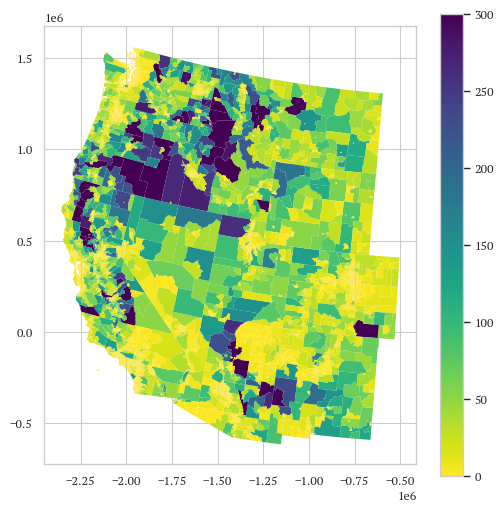

In [16]:
# Define a normalization from 0 to a maximum value
import matplotlib.colors as mcolors
norm = mcolors.Normalize(vmin=data['wfday'].min(), vmax=300)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
data.plot(
        column="wfday", ax=ax, legend=True, linewidth=0, cmap="viridis_r", missing_kwds={"color": "lightgrey"}, norm=norm
        )

In [21]:
# number of census tracts

len(data.GEOID.unique())

18108

In [22]:
len(data.COUNTY_FIP.unique())

69

In [24]:
len(data.STATE_FIPS.unique())

12

In [37]:
data.POPULATION.sum()

76334073

In [33]:
data.STATE_ABBR.unique()

array(['AZ', 'CA', 'CO', 'ID', 'MT', 'NV', 'NM', 'OR', 'TX', 'UT', 'WA',
       'WY'], dtype=object)

In [13]:
data.columns

Index(['STATE_ABBR', 'STATE_FIPS', 'COUNTY_FIP', 'STCOFIPS', 'TRACT_FIPS',
       'FIPS', 'POPULATION', 'POP_SQMI', 'SQMI', 'Shape_Leng', 'Shape_Area',
       'geometry', 'GEOID', 'wfday', 'heatday', 'smoke_pm_non_zero',
       'smoke_pm_gt_five', 'hw', '_hws', 'hs', 'hws', 'ws', 'hs5', 'hws5',
       'ws5', 'heatday_2d', 'smoke_pm_non_zero_2d', 'wfday_2d', '_hws_2d',
       'hs_2d', 'hws_2d', 'ws_2d'],
      dtype='object')

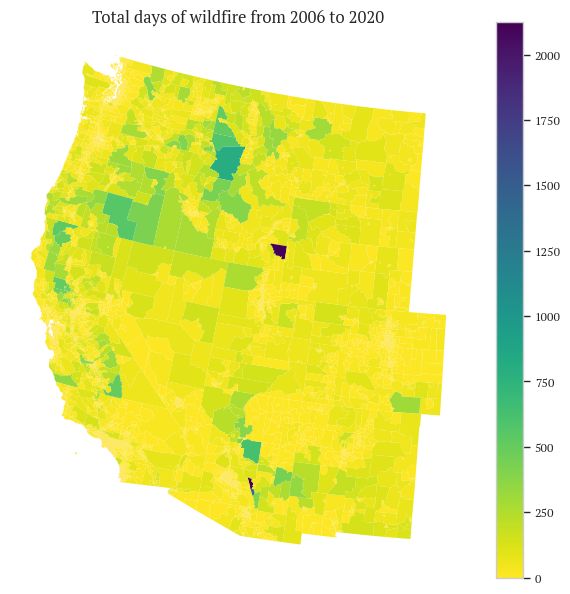

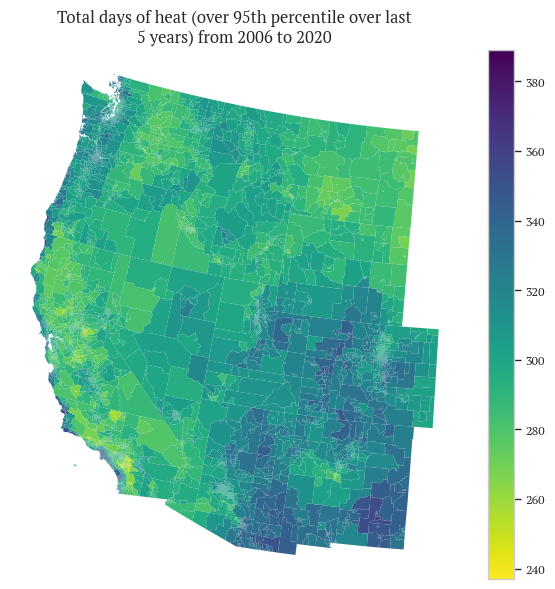

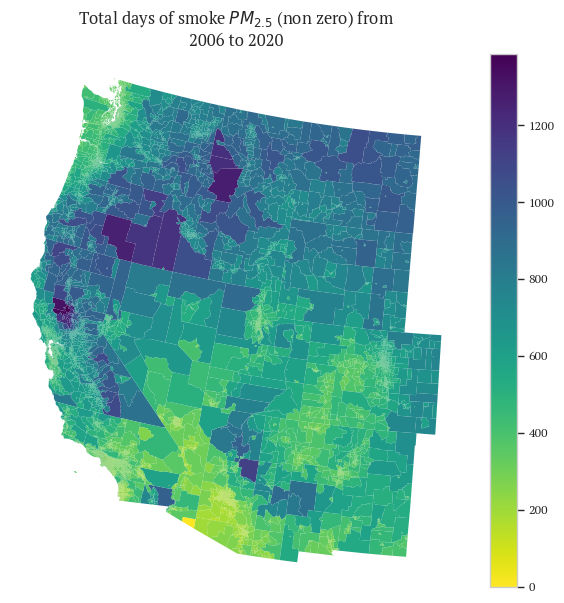

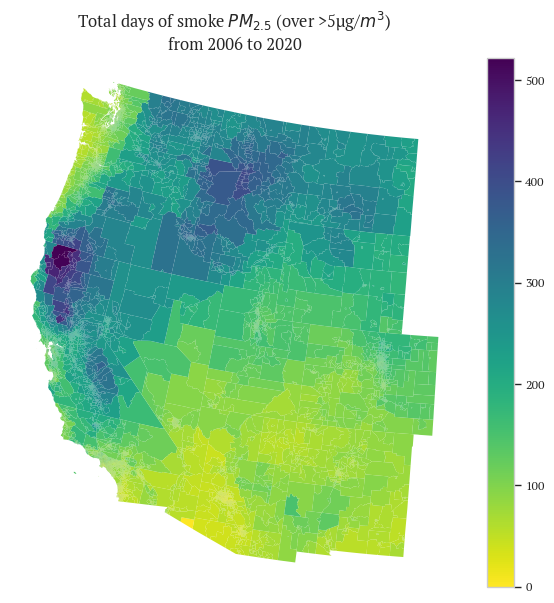

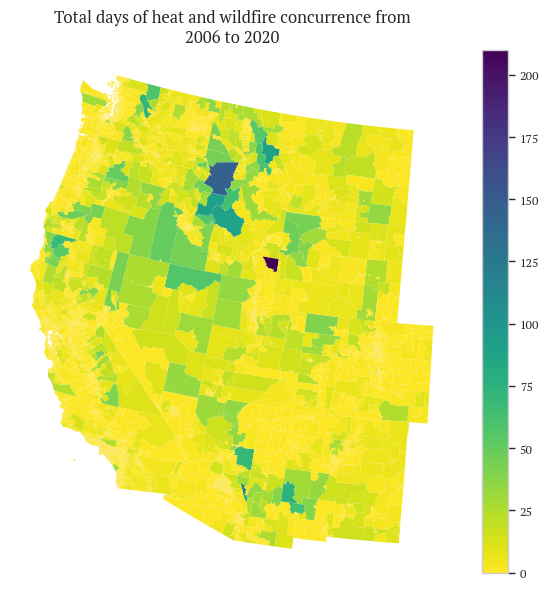

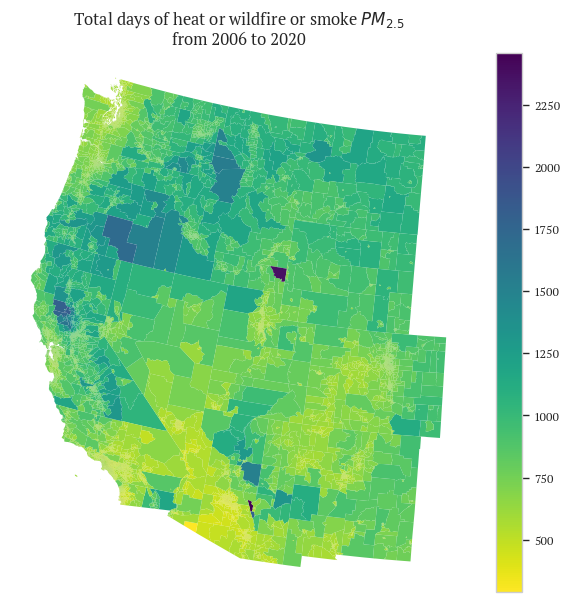

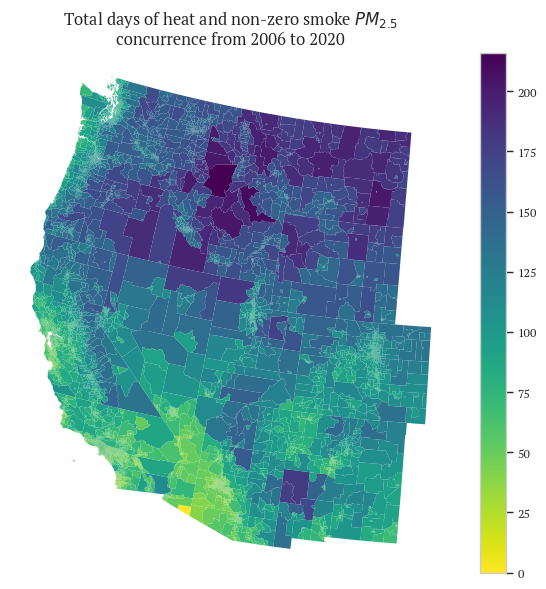

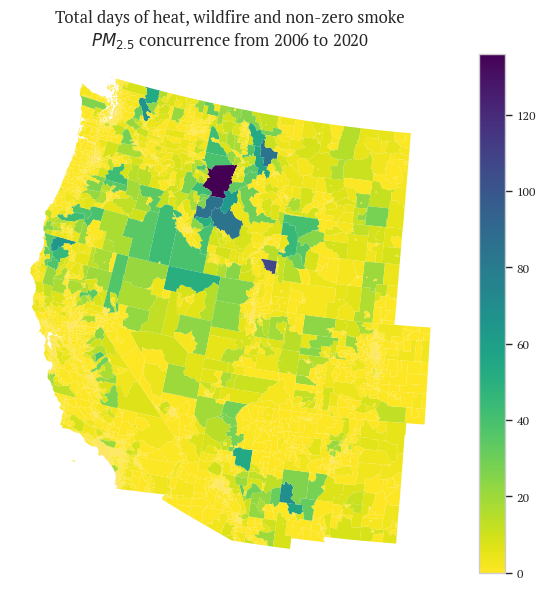

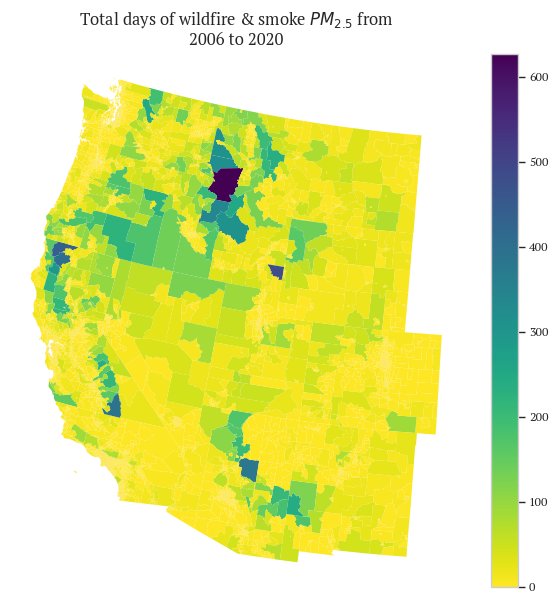

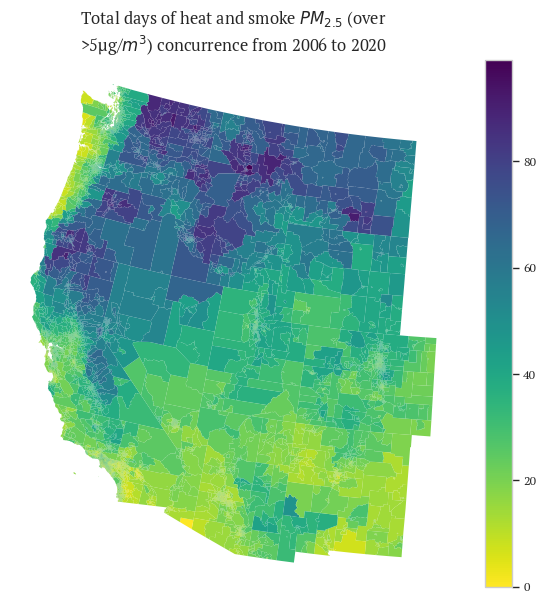

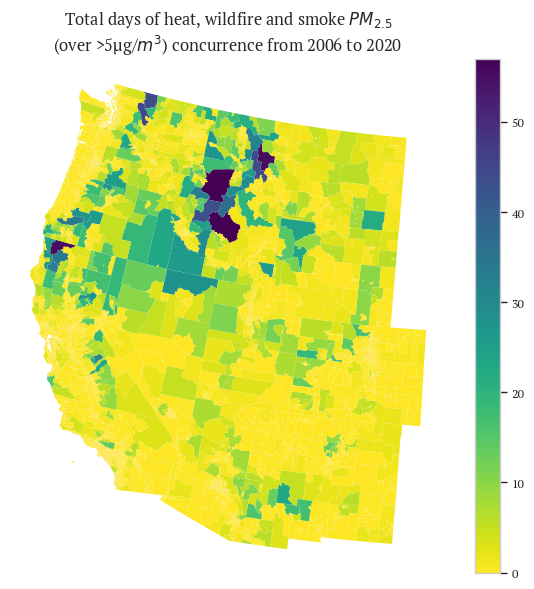

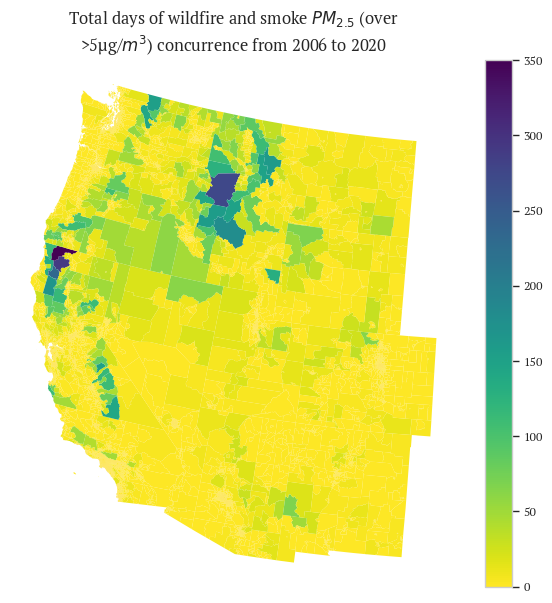

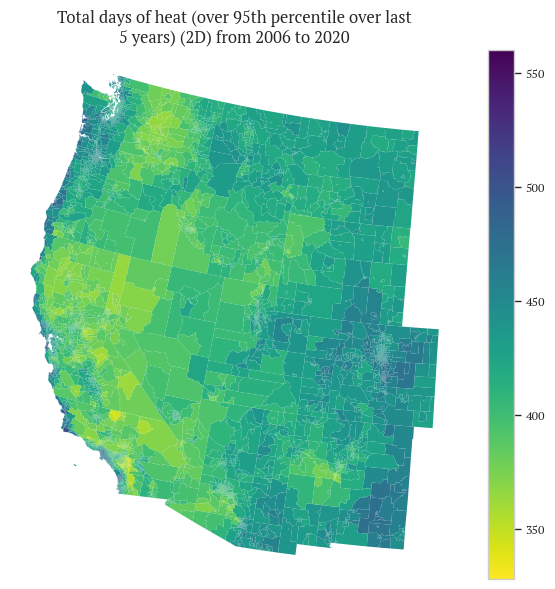

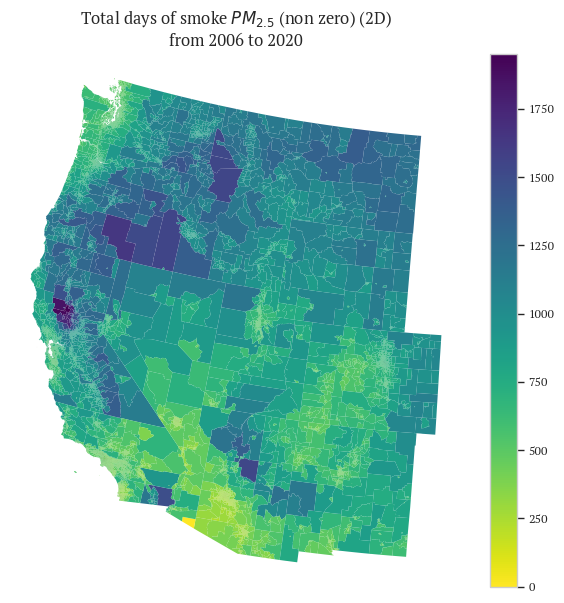

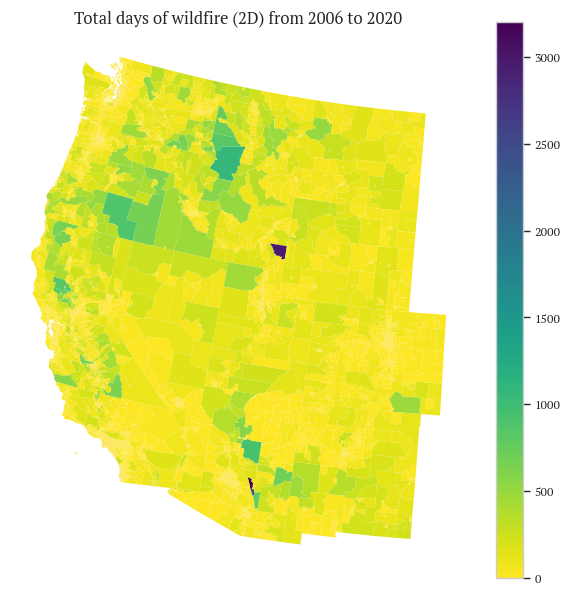

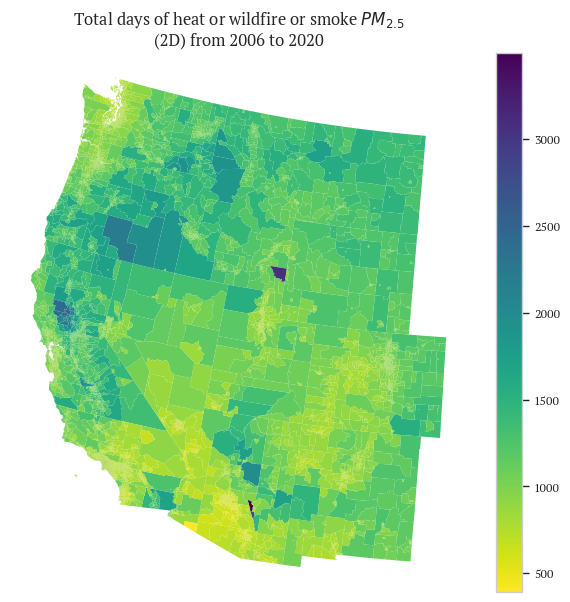

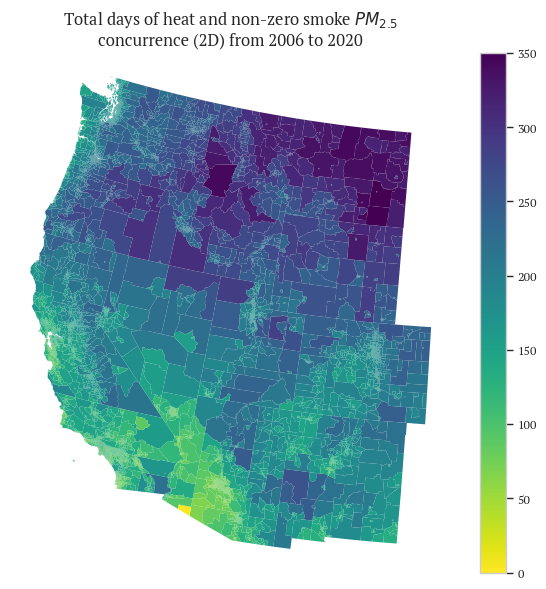

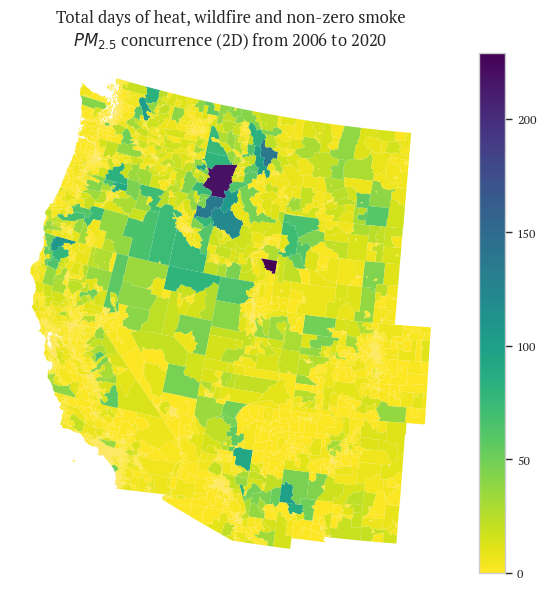

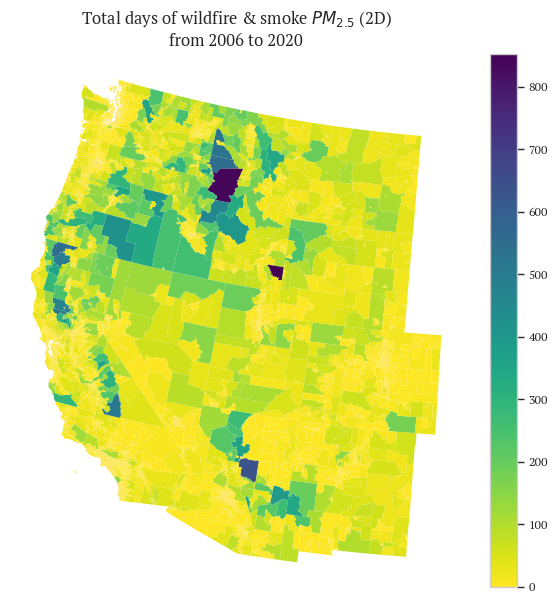

In [32]:
for x in hspts:
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    
    data.plot(
        column=x, ax=ax, legend=True, linewidth=0, cmap="viridis_r", missing_kwds={"color": "lightgrey"},
        )
    
    wrapped_title = textwrap.fill(hs_dict[x]["title_map"] + " from 2006 to 2020", 50)
    ax.set_title(wrapped_title, fontsize=12)
    ax.set_axis_off()
    
    plt.tight_layout()
    plt.savefig("figures/centract_hotspots_wc_" + hs_dict[x]["title"] + ".png")
    plt.show()

## Add Vunerability Index

In [63]:
cols = [
    "STCNTY",
    "FIPS",
    "E_AFAM",
    "EP_AFAM",
    "E_TOTPOP",
    "EP_POV150",
    "EP_UNEMP",
    "EP_AGE65",
    "RPL_THEMES",
]
vind = pd.read_csv("data/California.csv", usecols=cols, dtype={"FIPS": str})
vind = vind[vind["RPL_THEMES"] > -1]

In [40]:
file_names = [
"SVI2020_ARIZONA_tract.gdb",
"SVI2020_CALIFORNIA_tract.gdb",
"SVI2020_COLORADO_tract.gdb",
"SVI2020_IDAHO_tract.gdb",
"SVI2020_MONTANA_tract.gdb",
"SVI2020_NEVADA_tract.gdb",
"SVI2020_NEWMEXICO_tract.gdb",
"SVI2020_OREGON_tract.gdb",
"SVI2020_TEXAS_tract.gdb",
"SVI2020_UTAH_tract.gdb",
"SVI2020_WASHINGTON_tract.gdb",
"SVI2020_WYOMING_tract.gdb"]

In [42]:
# Initialize an empty list to store GeoDataFrames
gdframes = []
import os
# Loop through all the file names
for file in file_names:
    # Check if file exists
    if os.path.exists("data/" + file):
        # Load the file into a GeoDataFrame
        gdf = gpd.read_file("data/" + file)
        
        # Append the GeoDataFrame to the list
        gdframes.append(gdf)
    else:
        print(f'File {file} does not exist.')

# Concatenate all GeoDataFrames in the list
combined_gdf = pd.concat(gdframes, ignore_index=True)

In [43]:
combined_gdf.to_file("outputs/combined_SVI_data.geojson", driver='GeoJSON')

In [64]:
combined_gdf = gpd.read_file("outputs/combined_SVI_data.geojson") # 

In [68]:
combined_gdf[combined_gdf.RPL_THEMES < 0]["RPL_THEMES"]

Series([], Name: RPL_THEMES, dtype: float64)

In [67]:
# combined_gdf = combined_gdf[combined_gdf.RPL_THEMES >= 0]
combined_gdf = combined_gdf.replace(-999, np.nan)

In [69]:
df = pd.read_parquet("outputs/agg_hotspots_per_fips_rolling_wc.parquet")

In [70]:
vind2 = combined_gdf.merge(df, right_on="GEOID", left_on="FIPS")

In [71]:
len(combined_gdf)

25014

In [72]:
len(vind2)

18107

<Axes: >

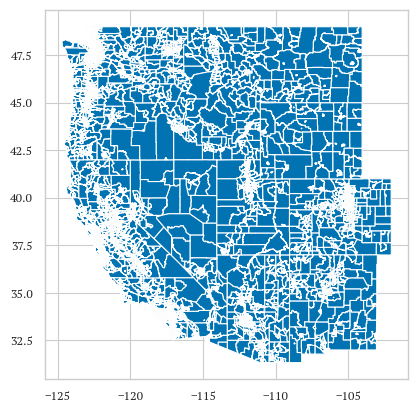

In [73]:
vind2.plot()

In [74]:
vind2.to_file("outputs/hotspot_vind_censustract_wc.geojson", driver='GeoJSON')

In [65]:
df = df.merge(vind, left_on="GEOID", right_on="FIPS")

In [67]:
df.to_csv("hotspot_vind_censustract.csv", index=False)

## Misc Plots

In [ ]:
census_tracts = gpd.read_file(
    "data/shapefiles/tl_2020_06_tract/tl_2020_06_tract.shp", dtype={"GEOID": int}
)
df = census_tracts.merge(vind, left_on="GEOID", right_on="FIPS")

In [ ]:
varsdict = {
    "EP_POV150": "Persons below 150% poverty estimate (%)",
    "EP_UNEMP": "Civilian (16+) unemployed estimate (%)",
    "EP_AGE65": "Persons aged 65 or older (%)",
    "EP_AFAM": "Black African-American",
}
pallete = {
    "EP_POV150": "pink_r",
    "EP_UNEMP": "summer_r",
    "EP_AGE65": "winter_r",
    "EP_AFAM": "cool",
}  # 'pink', 'spring', 'summer', 'autumn', 'winter', 'cool','Wistia'

/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_36628/2880580489.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


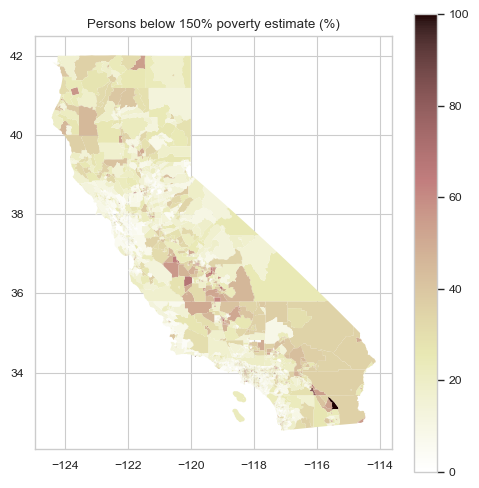

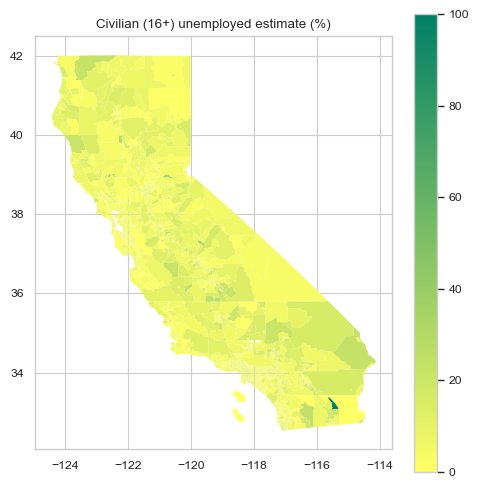

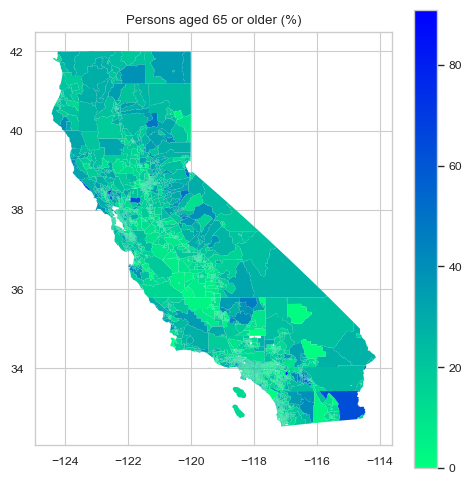

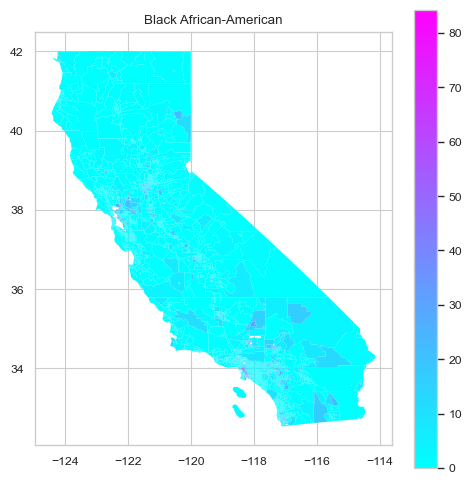

In [ ]:
for var in varsdict.keys():
    # Plot the map with a specified column and color palette
    ax = df.plot(
        column=var, cmap=pallete[var], figsize=(5, 5), linewidth=0, edgecolor="black"
    )

    # Add a color bar to the plot
    sm = plt.cm.ScalarMappable(
        cmap=pallete[var], norm=plt.Normalize(vmin=df[var].min(), vmax=df[var].max())
    )
    sm.var = []
    cbar = plt.colorbar(sm)
    plt.title(varsdict[var])
    plt.tight_layout()
    plt.savefig(varsdict[var])
    plt.show()